In [1]:
from RaceModels import *

%load_ext autoreload
%autoreload 2

In [2]:
MODELS_PATH = 'models/RaceModels/'

In [3]:
data_path = 'data/RaceMultiOutputModelRandomized/position/no_coef/Laps1to10/'
# Load data
X_train = pd.read_csv(f'{data_path}3copies_X_train.csv')
y_train = pd.read_csv(f'{data_path}3copies_y_train.csv')
X_valid = pd.read_csv(f'{data_path}3copies_X_valid.csv')
y_valid = pd.read_csv(f'{data_path}3copies_y_valid.csv')
X_test = pd.read_csv(f'{data_path}3copies_X_test.csv')
y_test = pd.read_csv(f'{data_path}3copies_y_test.csv')

# Drop copy_id
X_train.drop(['copy_id'],axis=1, inplace=True)
y_train.drop(['copy_id'],axis=1, inplace=True)
X_valid.drop(['copy_id'],axis=1, inplace=True)
y_valid.drop(['copy_id'],axis=1, inplace=True)
X_test.drop(['copy_id'],axis=1, inplace=True)
y_test.drop(['copy_id'],axis=1, inplace=True)

# Scale data
X_train = X_train / 25
y_train = y_train / 25
X_valid = X_valid / 25
y_valid = y_valid / 25
X_test = X_test / 25
y_test = y_test / 25

# Create Dataset and DataLoader for train and test sets
train_dataset = RaceDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
valid_dataset = RaceDataset(torch.tensor(X_valid.values, dtype=torch.float32), torch.tensor(y_valid.values, dtype=torch.float32))
test_dataset = RaceDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## reg_pos_3copies_1to10_1HL_mse

New model created


Training Progress:   0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 100/100 - Train Acc: 0.37 | Val Acc: 0.37: 100%|██████████| 100/100 [00:03<00:00, 30.20epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.219219,0.127150,0.082516,0.071895
1,2,0.110142,0.105861,0.100490,0.091503
2,3,0.097028,0.098955,0.133170,0.098039
3,4,0.090508,0.093171,0.151961,0.104575
4,5,0.086371,0.089053,0.187908,0.117647
...,...,...,...,...,...
95,96,0.057195,0.064693,0.366013,0.352941
96,97,0.057082,0.064677,0.366830,0.366013
97,98,0.056993,0.064651,0.373366,0.359477
98,99,0.056867,0.064661,0.373366,0.372549


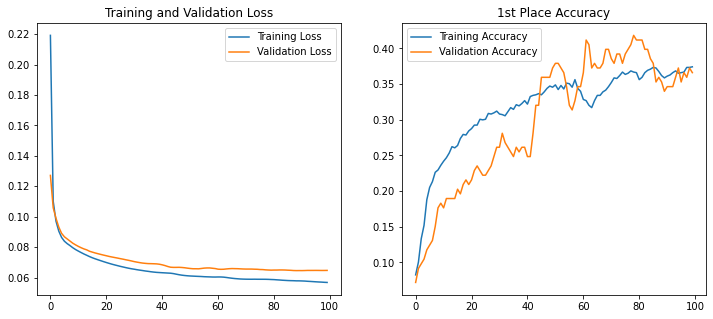

In [149]:
model_path = MODELS_PATH + 'reg_pos_3copies_1to10_1HL_mse/'
model = OneHiddenLayerReg(input_size=240)
criterion = nn.MSELoss()
lr = 0.001

load = False
train_regression_model(model_path, train_loader, valid_loader, model, criterion, epochs=100, load=load, lr=lr, viz=True)

Training Progress:  50%|█████     | 100/200 [00:00<?, ?epoch/s]

Epoch 200/200 - Train Acc: 0.37 | Val Acc: 0.34: 100%|██████████| 200/200 [00:03<00:00, 30.37epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.219219,0.127150,0.082516,0.071895
1,2,0.110142,0.105861,0.100490,0.091503
2,3,0.097028,0.098955,0.133170,0.098039
3,4,0.090508,0.093171,0.151961,0.104575
4,5,0.086371,0.089053,0.187908,0.117647
...,...,...,...,...,...
195,196,0.052077,0.068228,0.375000,0.320261
196,197,0.052000,0.068284,0.377451,0.320261
197,198,0.052017,0.068270,0.375817,0.320261
198,199,0.052148,0.068494,0.374183,0.313725


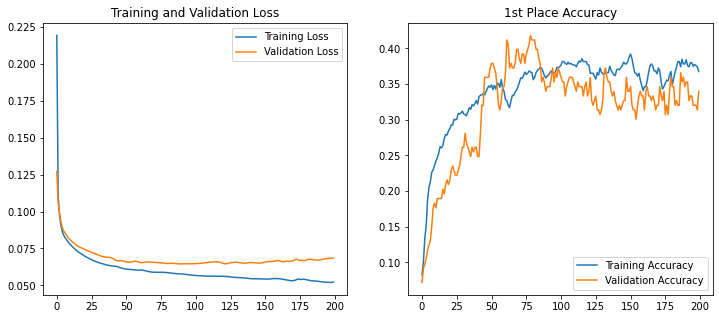

In [150]:
load = True
epochs = 100
train_regression_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## reg_pos_3copies_1to10_2HL_mse

New model created


Training Progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Epoch 500/500 - Train Acc: 0.32 | Val Acc: 0.25: 100%|██████████| 500/500 [00:18<00:00, 26.92epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.268279,0.144730,0.027778,0.039216
1,2,0.123358,0.110216,0.029412,0.058824
2,3,0.108393,0.110728,0.075163,0.065359
3,4,0.105600,0.108302,0.082516,0.065359
4,5,0.100987,0.102975,0.085784,0.078431
...,...,...,...,...,...
495,496,0.047793,0.076765,0.317810,0.235294
496,497,0.047761,0.076018,0.311275,0.248366
497,498,0.047779,0.075678,0.318627,0.241830
498,499,0.047705,0.075046,0.325163,0.267974


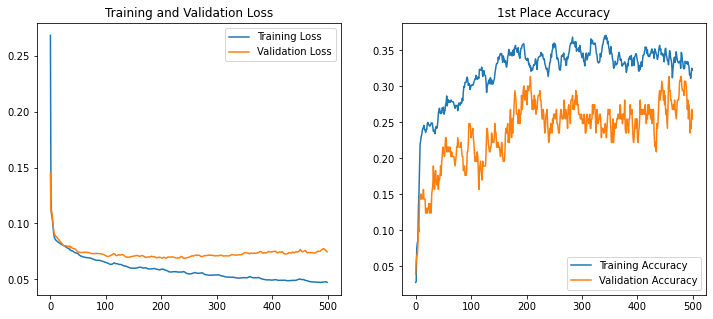

In [151]:
model_path = MODELS_PATH + 'reg_pos_3copies_1to10_2HL_mse/'
model = TwoHiddenLayerReg(input_size=240)
criterion = nn.MSELoss()
lr = 0.001

epochs = 500
load = False
train_regression_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## reg_pos_3copies_1to10_1HL_customweightrankingloss

New model created


Training Progress:   0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch 10/10 - Train Acc: 0.19 | Val Acc: 0.12: 100%|██████████| 10/10 [18:38<00:00, 111.88s/epoch]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,1.747933,1.511849,0.043301,0.052288
1,2,1.332098,1.263234,0.049020,0.052288
2,3,1.216165,1.196003,0.056373,0.058824
3,4,1.146480,1.107960,0.057190,0.084967
4,5,1.051475,1.013959,0.080065,0.084967
5,6,0.988255,0.984764,0.122549,0.111111
6,7,0.949414,0.946747,0.155229,0.124183
7,8,0.926466,0.931925,0.172386,0.130719
8,9,0.913038,0.931063,0.174020,0.124183
9,10,0.906203,0.928549,0.189542,0.124183


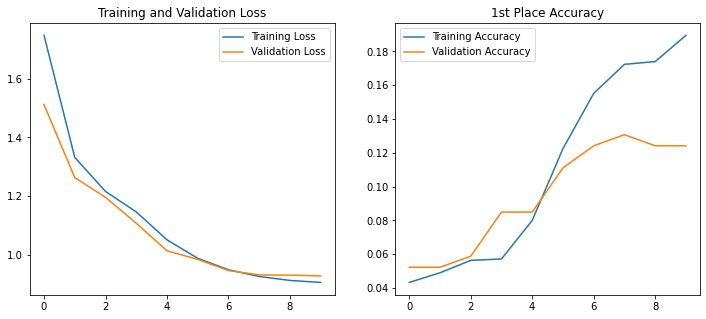

In [34]:
model_path = MODELS_PATH + 'reg_pos_3copies_1to10_1HL_customweightrankingloss/'
model = OneHiddenLayerReg(input_size=240)
criterion = WeightedRankingLoss()
lr = 0.001

load = False
epochs = 10
train_regression_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  99%|█████████▉| 110/111 [00:00<?, ?epoch/s]

Epoch 111/111 - Train Acc: 0.29 | Val Acc: 0.30: 100%|██████████| 111/111 [01:48<00:00, 108.55s/epoch]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,1.747933,1.511849,0.043301,0.052288
1,2,1.332098,1.263234,0.049020,0.052288
2,3,1.216165,1.196003,0.056373,0.058824
3,4,1.146480,1.107960,0.057190,0.084967
4,5,1.051475,1.013959,0.080065,0.084967
...,...,...,...,...,...
106,107,0.759960,0.862090,0.291667,0.287582
107,108,0.758756,0.862440,0.292484,0.294118
108,109,0.758053,0.863121,0.302288,0.300654
109,110,0.758129,0.865614,0.292484,0.300654


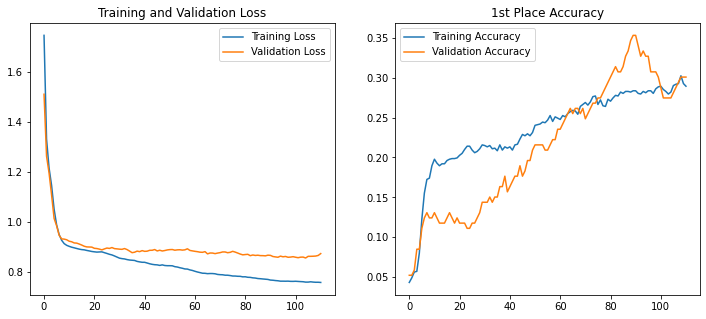

In [107]:
model_path = MODELS_PATH + 'reg_pos_3copies_1to10_1HL_customweightrankingloss/'
model = OneHiddenLayerReg(input_size=240)
criterion = WeightedRankingLoss()
lr = 0.001

load = True
epochs = 1
train_regression_model(model_path, train_loader, valid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

# Classification

In [75]:
data_path = 'data/RaceMultiOutputModelRandomized/position/no_coef/Laps1to10/'

by_train = np.argmin(y_train.values, axis=1)
by_valid = np.argmin(y_valid.values, axis=1)
by_test = np.argmin(y_test.values, axis=1)


# Create Dataset and DataLoader for train and test sets
btrain_dataset = RaceDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(by_train, dtype=torch.long))
bvalid_dataset = RaceDataset(torch.tensor(X_valid.values, dtype=torch.float32), torch.tensor(by_valid, dtype=torch.long))
btest_dataset = RaceDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(by_test, dtype=torch.long))

btrain_loader = DataLoader(btrain_dataset, batch_size=64, shuffle=False)
bvalid_loader = DataLoader(bvalid_dataset, batch_size=64, shuffle=False)
btest_loader = DataLoader(btest_dataset, batch_size=64, shuffle=False)


## classif_pos_3copies1to10_1HL

New model created


Training Progress:   0%|          | 0/150 [00:00<?, ?epoch/s]

Epoch 150/150 - Train Acc: 0.76 | Val Acc: 0.38: 100%|██████████| 150/150 [00:05<00:00, 29.30epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.093581,3.062185,0.102124,0.130719
1,2,2.967727,3.006107,0.212418,0.163399
2,3,2.862712,2.952812,0.227941,0.137255
3,4,2.781072,2.904251,0.225490,0.137255
4,5,2.700923,2.851531,0.229575,0.143791
...,...,...,...,...,...
145,146,0.774550,2.206303,0.750000,0.379085
146,147,0.765896,2.212455,0.752451,0.379085
147,148,0.759723,2.210952,0.754085,0.372549
148,149,0.755076,2.210018,0.755719,0.379085


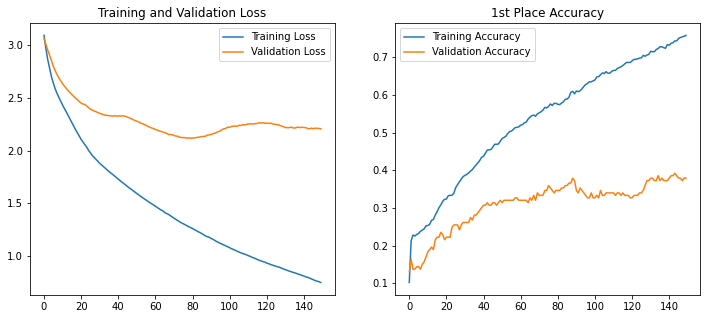

In [153]:
model_path = MODELS_PATH + 'classif_pos_3copies1to10_1HL/'
model = OneHiddenLayerClassification()
lr = 0.001

load = False
epochs = 150
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## classif_pos_3copies1to10_2HL_dropout0.5

New model created


Training Progress:   0%|          | 0/150 [00:00<?, ?epoch/s]

Epoch 150/150 - Train Acc: 0.30 | Val Acc: 0.20: 100%|██████████| 150/150 [00:06<00:00, 23.27epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.151967,3.142915,0.065359,0.071895
1,2,3.111247,3.116613,0.072712,0.065359
2,3,3.067061,3.097744,0.098039,0.098039
3,4,3.066672,3.082565,0.106209,0.124183
4,5,3.034764,3.070464,0.117647,0.130719
...,...,...,...,...,...
145,146,2.365613,2.611770,0.290850,0.196078
146,147,2.395965,2.581053,0.279412,0.196078
147,148,2.420150,2.612826,0.290033,0.196078
148,149,2.401311,2.620567,0.293301,0.189542


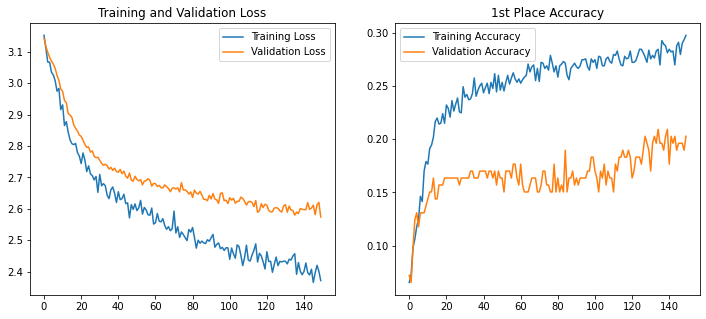

In [154]:
model_path = MODELS_PATH + 'classif_pos_3copies1to10_2HL_dropout0.5/'
model = TwoHiddenLayerDropoutClassification(input_size=240, dropout_rate=0.5)
lr = 0.001

load = False
epochs = 150
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  30%|███       | 150/500 [00:00<?, ?epoch/s]

Epoch 500/500 - Train Acc: 0.34 | Val Acc: 0.27: 100%|██████████| 500/500 [00:14<00:00, 24.23epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.151967,3.142915,0.065359,0.071895
1,2,3.111247,3.116613,0.072712,0.065359
2,3,3.067061,3.097744,0.098039,0.098039
3,4,3.066672,3.082565,0.106209,0.124183
4,5,3.034764,3.070464,0.117647,0.130719
...,...,...,...,...,...
495,496,2.145909,2.730662,0.338235,0.261438
496,497,2.132551,2.672410,0.354575,0.248366
497,498,2.165727,2.771435,0.348039,0.235294
498,499,2.158361,2.668322,0.351307,0.261438


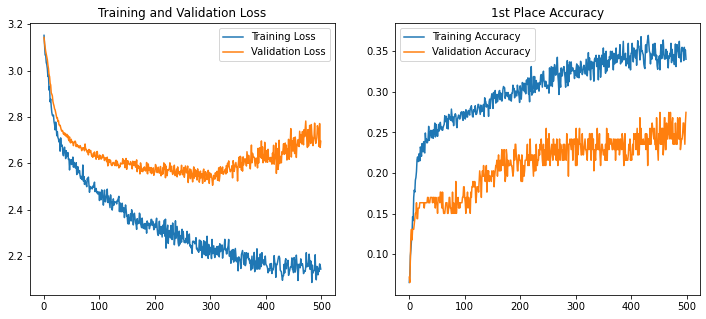

In [155]:
load = True
epochs = 350
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## classif_pos_3copies1to10_2HL_dropout0.2lr0.0001/

New model created


Training Progress:   0%|          | 0/150 [00:00<?, ?epoch/s]

Epoch 150/150 - Train Acc: 0.28 | Val Acc: 0.19: 100%|██████████| 150/150 [00:06<00:00, 23.57epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.203127,3.186980,0.022059,0.039216
1,2,3.187058,3.177708,0.049020,0.052288
2,3,3.174252,3.166746,0.062908,0.071895
3,4,3.151106,3.152288,0.079248,0.065359
4,5,3.138101,3.138421,0.084967,0.065359
...,...,...,...,...,...
145,146,2.424944,2.604154,0.267157,0.183007
146,147,2.470072,2.600326,0.261438,0.196078
147,148,2.430497,2.596805,0.263072,0.196078
148,149,2.428038,2.596405,0.285131,0.196078


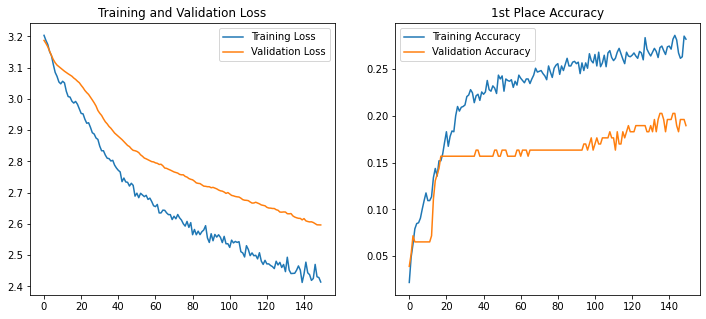

In [156]:
model_path = MODELS_PATH + 'classif_pos_3copies1to10_2HL_dropout0.2lr0.0001/'
model = TwoHiddenLayerDropoutClassification(input_size=240, dropout_rate=0.2)
lr = 0.0001

load = False
epochs = 150
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

Training Progress:  12%|█▏        | 150/1250 [00:00<?, ?epoch/s]

Epoch 1250/1250 - Train Acc: 0.58 | Val Acc: 0.31: 100%|██████████| 1250/1250 [00:46<00:00, 23.88epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.203127,3.186980,0.022059,0.039216
1,2,3.187058,3.177708,0.049020,0.052288
2,3,3.174252,3.166746,0.062908,0.071895
3,4,3.151106,3.152288,0.079248,0.065359
4,5,3.138101,3.138421,0.084967,0.065359
...,...,...,...,...,...
1245,1246,1.262674,2.262634,0.581699,0.307190
1246,1247,1.289770,2.270354,0.561275,0.313725
1247,1248,1.255280,2.264405,0.574346,0.300654
1248,1249,1.240676,2.268657,0.576797,0.294118


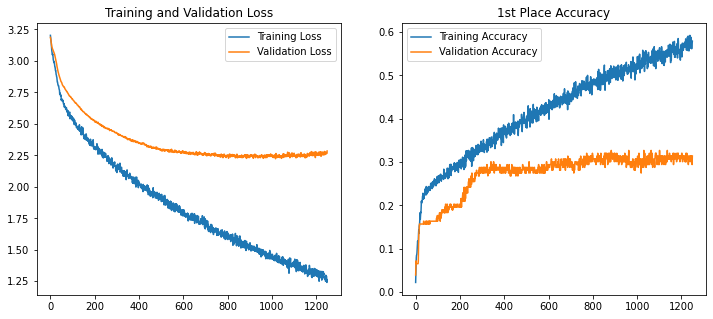

In [157]:
load = True
epochs = 1100
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## classif_pos_3copies1to10_2HL_dropout0.5lr0.0001/

New model created


Training Progress:   0%|          | 0/2000 [00:00<?, ?epoch/s]

Epoch 2000/2000 - Train Acc: 0.44 | Val Acc: 0.33: 100%|██████████| 2000/2000 [01:23<00:00, 23.82epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.174793,3.187422,0.058824,0.058824
1,2,3.169747,3.181199,0.046569,0.065359
2,3,3.160378,3.176018,0.056373,0.065359
3,4,3.151542,3.170625,0.066993,0.058824
4,5,3.146469,3.164802,0.067810,0.058824
...,...,...,...,...,...
1995,1996,1.723043,2.472809,0.459967,0.326797
1996,1997,1.710715,2.495608,0.437908,0.307190
1997,1998,1.786569,2.481234,0.449346,0.326797
1998,1999,1.753763,2.485344,0.446078,0.326797


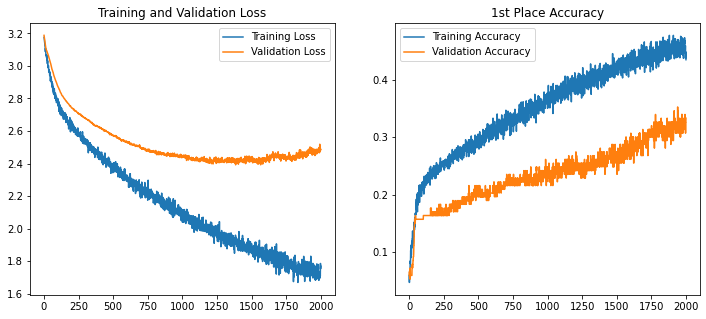

In [158]:
model_path = MODELS_PATH + 'classif_pos_3copies1to10_2HL_dropout0.5lr0.0001/'
model = TwoHiddenLayerDropoutClassification(input_size=240, dropout_rate=0.5)
lr = 0.0001

load = False
epochs = 2000
train_classification_model(model_path, btrain_loader, bvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

# Coef

In [159]:
coef_data_path = 'data/RaceMultiOutputModelRandomized/position/coef/Laps1to5/'
# Load data
cX_train = pd.read_csv(f'{coef_data_path}3copies_X_train.csv')
cy_train = pd.read_csv(f'{coef_data_path}3copies_y_train.csv')
cX_valid = pd.read_csv(f'{coef_data_path}3copies_X_valid.csv')
cy_valid = pd.read_csv(f'{coef_data_path}3copies_y_valid.csv')
cX_test = pd.read_csv(f'{coef_data_path}3copies_X_test.csv')
cy_test = pd.read_csv(f'{coef_data_path}3copies_y_test.csv')

# Drop copy_id
cX_train.drop(['copy_id'],axis=1, inplace=True)
cy_train.drop(['copy_id'],axis=1, inplace=True)
cX_valid.drop(['copy_id'],axis=1, inplace=True)
cy_valid.drop(['copy_id'],axis=1, inplace=True)
cX_test.drop(['copy_id'],axis=1, inplace=True)
cy_test.drop(['copy_id'],axis=1, inplace=True)

scaler = MinMaxScaler()
# Scale data
cX_train = scaler.fit_transform(cX_train)
cy_train = cy_train / 25
cX_valid = scaler.transform(cX_valid)
cy_valid = cy_valid / 25
cX_test = scaler.transform(cX_test)
cy_test = cy_test / 25

# Create Dataset and DataLoader for train and test sets
ctrain_dataset = RaceDataset(torch.tensor(cX_train, dtype=torch.float32), torch.tensor(cy_train.values, dtype=torch.float32))
cvalid_dataset = RaceDataset(torch.tensor(cX_valid, dtype=torch.float32), torch.tensor(cy_valid.values, dtype=torch.float32))
ctest_dataset = RaceDataset(torch.tensor(cX_test, dtype=torch.float32), torch.tensor(cy_test.values, dtype=torch.float32))

ctrain_loader = DataLoader(ctrain_dataset, batch_size=64, shuffle=False)
cvalid_loader = DataLoader(cvalid_dataset, batch_size=64, shuffle=False)
ctest_loader = DataLoader(ctest_dataset, batch_size=64, shuffle=False)


## reg_pos_coef_3copies_1to5_1HL_mse/

New model created


Training Progress:   0%|          | 0/400 [00:00<?, ?epoch/s]

Epoch 400/400 - Train Acc: 0.48 | Val Acc: 0.39: 100%|██████████| 400/400 [00:11<00:00, 33.94epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.409878,0.385392,0.073529,0.071895
1,2,0.351843,0.322270,0.118464,0.058824
2,3,0.283808,0.246660,0.111111,0.058824
3,4,0.208948,0.175599,0.111111,0.058824
4,5,0.150473,0.132128,0.111111,0.058824
...,...,...,...,...,...
395,396,0.055456,0.063880,0.477941,0.379085
396,397,0.055441,0.063885,0.474673,0.379085
397,398,0.055427,0.063884,0.477941,0.385621
398,399,0.055413,0.063887,0.475490,0.385621


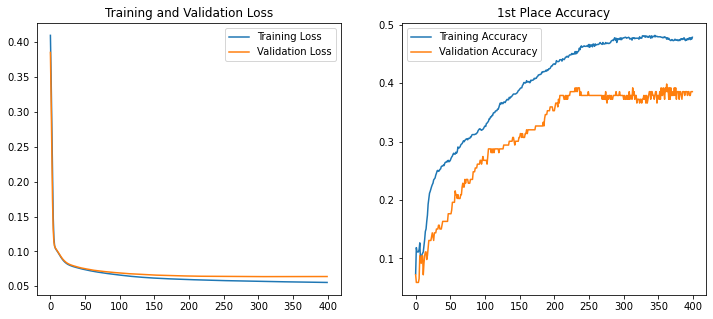

In [160]:
model_path = MODELS_PATH + 'reg_pos_coef_3copies_1to5_1HL_mse/'
model = OneHiddenLayerReg(input_size=24*6)
criterion = nn.MSELoss()
lr = 0.0001

epochs = 400
load = False
train_regression_model(model_path, ctrain_loader, cvalid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## reg_pos_coef_3copies_1to5_2HL_mse

New model created


Training Progress:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Epoch 1000/1000 - Train Acc: 0.42 | Val Acc: 0.34: 100%|██████████| 1000/1000 [00:33<00:00, 30.28epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,0.399350,0.394487,0.026144,0.026144
1,2,0.377398,0.369085,0.013889,0.032680
2,3,0.345149,0.327996,0.014706,0.032680
3,4,0.295328,0.268380,0.014706,0.032680
4,5,0.234476,0.213094,0.014706,0.026144
...,...,...,...,...,...
995,996,0.054490,0.068755,0.421569,0.339869
996,997,0.054479,0.068747,0.422386,0.352941
997,998,0.054468,0.068747,0.417484,0.339869
998,999,0.054454,0.068736,0.420752,0.346405


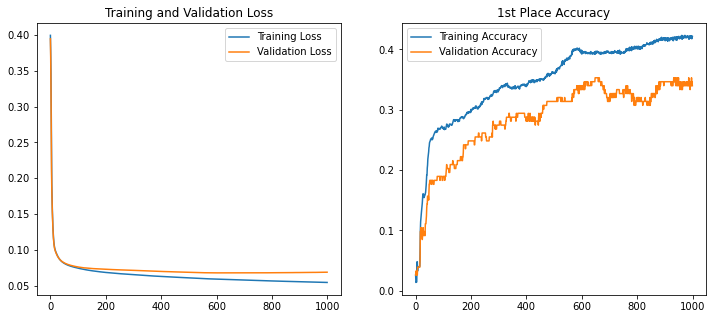

In [161]:
model = TwoHiddenLayerReg(input_size=24*6)
criterion = nn.MSELoss()
lr = 0.0001

model_path = MODELS_PATH + 'reg_pos_coef_3copies_1to5_2HL_mse/'
epochs = 1000
load = False
train_regression_model(model_path, ctrain_loader, cvalid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

## reg_pos_3_coef_copies_1to5_2HL_customweightrankingloss

New model created


Epoch 1/1 - Train Acc: 0.04 | Val Acc: 0.04: 100%|██████████| 1/1 [01:51<00:00, 111.12s/epoch]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,1.740169,1.52888,0.040033,0.039216


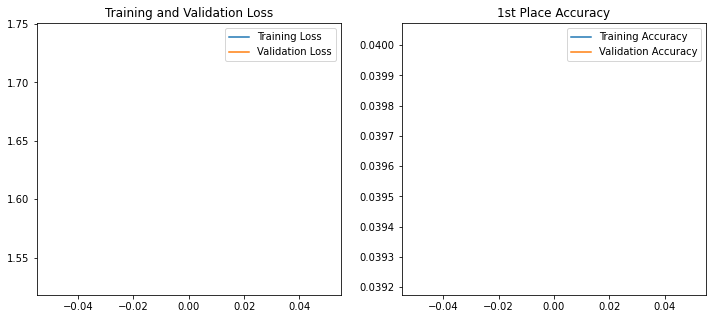

In [138]:
model_path = MODELS_PATH + 'reg_pos_3_coef_copies_1to5_2HL_customweightrankingloss/'
model = TwoHiddenLayerReg(input_size=24*6)
criterion = WeightedRankingLoss()
lr = 0.001

load = False
epochs = 1
train_regression_model(model_path, ctrain_loader, cvalid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

Epoch 140/140 - Train Acc: 0.32 | Val Acc: 0.29: 100%|██████████| 140/140 [19:10<00:00, 115.07s/epoch]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,1.740169,1.528880,0.040033,0.039216
1,2,1.309434,1.217181,0.063725,0.071895
2,3,1.192670,1.170169,0.045752,0.039216
3,4,1.117493,1.081230,0.060458,0.039216
4,5,1.015215,0.969653,0.054739,0.032680
...,...,...,...,...,...
135,136,0.721431,0.876702,0.318627,0.307190
136,137,0.718993,0.879937,0.324346,0.300654
137,138,0.717841,0.879824,0.318627,0.294118
138,139,0.716412,0.884837,0.321078,0.287582


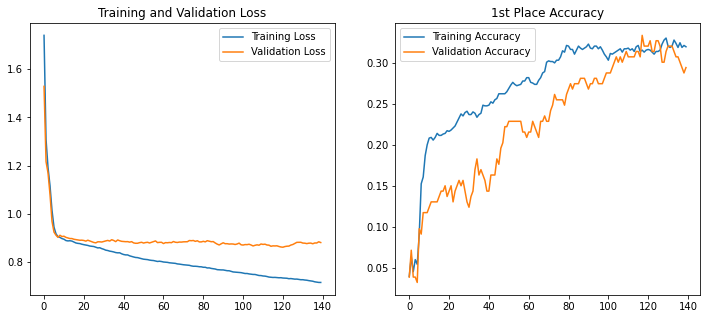

In [142]:
model_path = MODELS_PATH + 'reg_pos_3_coef_copies_1to5_2HL_customweightrankingloss/'
model = TwoHiddenLayerReg(input_size=24*6)
criterion = WeightedRankingLoss()
lr = 0.001

load = True
epochs = 10
train_regression_model(model_path, ctrain_loader, cvalid_loader, model, criterion, epochs=epochs, load=load, lr=lr, viz=True)

# Coef classification

In [162]:
data_path = 'data/RaceMultiOutputModelRandomized/position/coef/Laps1to5/'

bcy_train = np.argmin(cy_train.values, axis=1)
bcy_valid = np.argmin(cy_valid.values, axis=1)
bcy_test = np.argmin(cy_test.values, axis=1)


# Create Dataset and DataLoader for train and test sets
bctrain_dataset = RaceDataset(torch.tensor(cX_train, dtype=torch.float32), torch.tensor(bcy_train, dtype=torch.long))
bcvalid_dataset = RaceDataset(torch.tensor(cX_valid, dtype=torch.float32), torch.tensor(bcy_valid, dtype=torch.long))
bctest_dataset = RaceDataset(torch.tensor(cX_test, dtype=torch.float32), torch.tensor(bcy_test, dtype=torch.long))

bctrain_loader = DataLoader(bctrain_dataset, batch_size=64, shuffle=False)
bcvalid_loader = DataLoader(bcvalid_dataset, batch_size=64, shuffle=False)
bctest_loader = DataLoader(bctest_dataset, batch_size=64, shuffle=False)


## classif_pos_coef_3copies1to5_2HL_lr0.0001/

New model created


Training Progress:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Epoch 1000/1000 - Train Acc: 0.64 | Val Acc: 0.35: 100%|██████████| 1000/1000 [00:33<00:00, 29.99epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.172155,3.175141,0.047386,0.026144
1,2,3.161292,3.168673,0.048203,0.026144
2,3,3.150225,3.160427,0.048203,0.026144
3,4,3.135544,3.148821,0.121732,0.098039
4,5,3.115342,3.133449,0.135621,0.078431
...,...,...,...,...,...
995,996,1.078171,2.296280,0.642157,0.352941
996,997,1.077766,2.298178,0.642974,0.352941
997,998,1.076326,2.297029,0.643791,0.352941
998,999,1.075671,2.298333,0.644608,0.352941


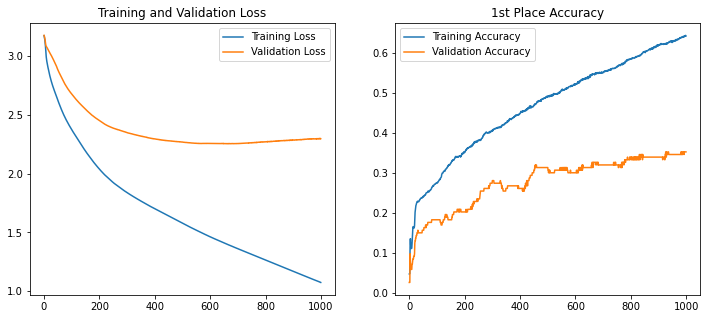

In [163]:
model = TwoHiddenLayerDropoutClassification(input_size=24*6, dropout_rate=0)
lr = 0.0001

model_path = MODELS_PATH + 'classif_pos_coef_3copies1to5_2HL_lr0.0001/'
load = False
epochs = 1000
train_classification_model(model_path, bctrain_loader, bcvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## classif_pos_coef_3copies1to5_2HL_dropout0.2lr0.0001/

New model created


Training Progress:   0%|          | 0/1250 [00:00<?, ?epoch/s]

Epoch 1250/1250 - Train Acc: 0.58 | Val Acc: 0.39: 100%|██████████| 1250/1250 [00:47<00:00, 26.41epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.183270,3.160288,0.047386,0.052288
1,2,3.177741,3.156469,0.047386,0.052288
2,3,3.173965,3.154073,0.048203,0.052288
3,4,3.170987,3.151440,0.054739,0.052288
4,5,3.166809,3.147795,0.049837,0.052288
...,...,...,...,...,...
1245,1246,1.213319,2.193518,0.602941,0.359477
1246,1247,1.239890,2.176719,0.583333,0.372549
1247,1248,1.245724,2.185885,0.581699,0.366013
1248,1249,1.240315,2.192381,0.584150,0.372549


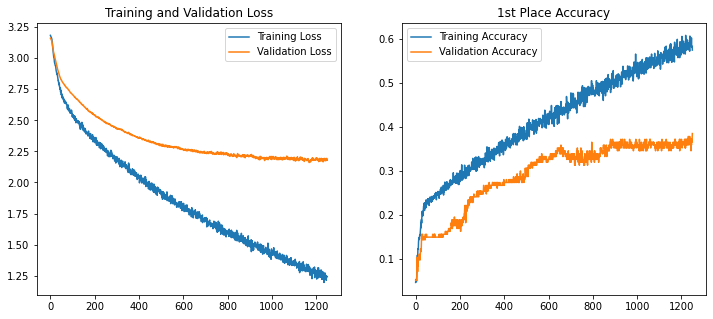

In [164]:
model = TwoHiddenLayerDropoutClassification(input_size=24*6, dropout_rate=0.2)
lr = 0.0001
model_path = MODELS_PATH + 'classif_pos_coef_3copies1to5_2HL_dropout0.2lr0.0001/'
load = False
epochs = 1250
train_classification_model(model_path, bctrain_loader, bcvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)

## classif_pos_coef_3copies1to5_2HL_dropout0.5lr0.0001/

New model created


Training Progress:   0%|          | 0/1500 [00:00<?, ?epoch/s]

Epoch 1500/1500 - Train Acc: 0.44 | Val Acc: 0.30: 100%|██████████| 1500/1500 [00:57<00:00, 26.23epoch/s]


Model saved


,epoch,training_losses,validation_losses,train_fp_acc,val_fp_acc
0,1,3.197040,3.179703,0.041667,0.065359
1,2,3.190236,3.176973,0.046569,0.058824
2,3,3.191653,3.174064,0.049837,0.071895
3,4,3.185575,3.172118,0.058824,0.065359
4,5,3.184047,3.169735,0.051471,0.065359
...,...,...,...,...,...
1495,1496,1.868064,2.480444,0.433007,0.320261
1496,1497,1.805566,2.500951,0.442810,0.313725
1497,1498,1.823422,2.493349,0.440359,0.313725
1498,1499,1.793723,2.513008,0.451797,0.313725


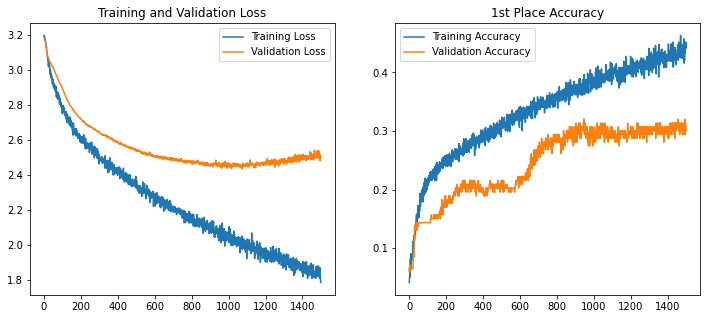

In [168]:
model = TwoHiddenLayerDropoutClassification(input_size=24*6, dropout_rate=0.5)
lr = 0.0001
model_path = MODELS_PATH + 'classif_pos_coef_3copies1to5_2HL_dropout0.5lr0.0001/'
load = False
epochs = 1500
train_classification_model(model_path, bctrain_loader, bcvalid_loader, model, epochs=epochs, load=load, lr=lr, viz=True)